In [83]:
%run import_data.ipynb

Dataset books.csv loaded successfully
Dataset books2.csv is being downloaded...
Dataset downloaded and saved as data/books2.csv
Dataset downloaded and saved as data/users.csv
Dataset downloaded and saved as data/ratings.csv
Pandas dataframes (books_df, books_big, users, ratings) loaded successfully
Columns renamed and dates converted to dtype: datetime
Ready to go!


### The 1st Dataset (goodreads)

In [84]:
books_df.head()

,bookid,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic


In [85]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   bookid              11127 non-null  int64         
 1   title               11127 non-null  object        
 2   authors             11127 non-null  object        
 3   average_rating      11127 non-null  float64       
 4   isbn                11127 non-null  object        
 5   isbn13              11127 non-null  int64         
 6   language_code       11127 non-null  object        
 7   num_pages           11127 non-null  int64         
 8   ratings_count       11127 non-null  int64         
 9   text_reviews_count  11127 non-null  int64         
 10  publication_date    11125 non-null  datetime64[ns]
 11  publisher           11127 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 1.0+ MB


##### Redundant column: ISBN vs. ISBN13

In [86]:
# Since isbn and isbn13 are the same thing and isbn13 is the newer, 
# globally applied format, we will drop isbn and keep isbn13
books_df.drop('isbn', axis=1, inplace=True)

#### Missing values

In [87]:
books_df.isnull().sum()

bookid                0
title                 0
authors               0
average_rating        0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      2
publisher             0
dtype: int64

In [88]:
books_df[books_df['publication_date'].isnull()]

,bookid,title,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
8180,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,9780553575101,eng,718,10608,295,NaT,Bantam Books
11098,45531,Montaillou village occitan de 1294 à 1324,Emmanuel Le Roy Ladurie/Emmanuel Le Roy-Ladurie,3.96,9782070323289,fre,640,15,2,NaT,Folio histoire


In [89]:
# Looked up the publication dates for the books with missing publication dates
books_df.iloc[books_df[books_df['isbn13'] == 9780553575101].index, books_df.columns.get_loc('publication_date')] = '10/31/2000'
books_df.iloc[books_df[books_df['isbn13'] == 9782070323289].index, books_df.columns.get_loc('publication_date')] = '06/01/1982'

In [90]:
books_df.isnull().sum()

bookid                0
title                 0
authors               0
average_rating        0
isbn13                0
language_code         0
num_pages             0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [110]:
# There are several language codes that are all English, so we will replace them with 'en'
books_df['language_code'] = books_df['language_code'].replace({'en-US': 'en', 'en-GB': 'en', 'en-CA': 'en','eng': 'en'}, inplace=True)

In [111]:
books_df.describe()

,bookid,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,publication_date
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000,11127
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498,2000-08-27 22:54:15.432731136
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000,1900-01-01 00:00:00
25%,10287.000000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000,1998-07-16 12:00:00
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000,2003-03-01 00:00:00
75%,32104.500000,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000,2005-09-30 00:00:00
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000,2020-03-31 00:00:00
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608,NaN


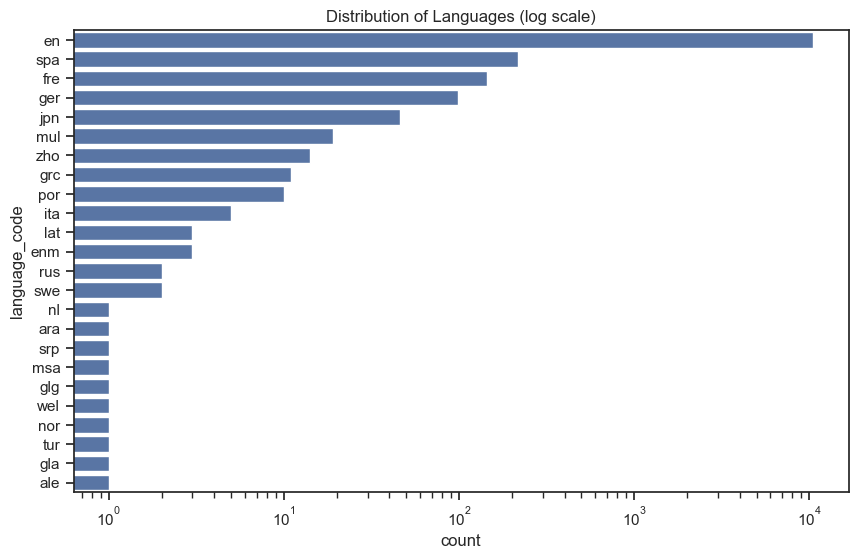

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of the column 'language_code'
plt.figure(figsize=(10, 6))
sns.countplot(y='language_code', data=books_df, order=books_df['language_code'].value_counts().index)
plt.xscale('log')
plt.title('Distribution of Languages (log scale)')
plt.show()

In [93]:
unique_titles = books_df['title'].nunique()
print(f"Number of unique book titles: {unique_titles}")

Number of unique book titles: 10352


In [94]:
most_frequent_titles = books_df['title'].value_counts().head(10)
print("Most frequent book titles (top 10):\n", most_frequent_titles)

Most frequent book titles (top 10):
 title
The Brothers Karamazov        9
The Iliad                     9
'Salem's Lot                  8
The Odyssey                   8
Gulliver's Travels            8
Anna Karenina                 8
A Midsummer Night's Dream     7
The Picture of Dorian Gray    7
The Secret Garden             6
Romeo and Juliet              6
Name: count, dtype: int64


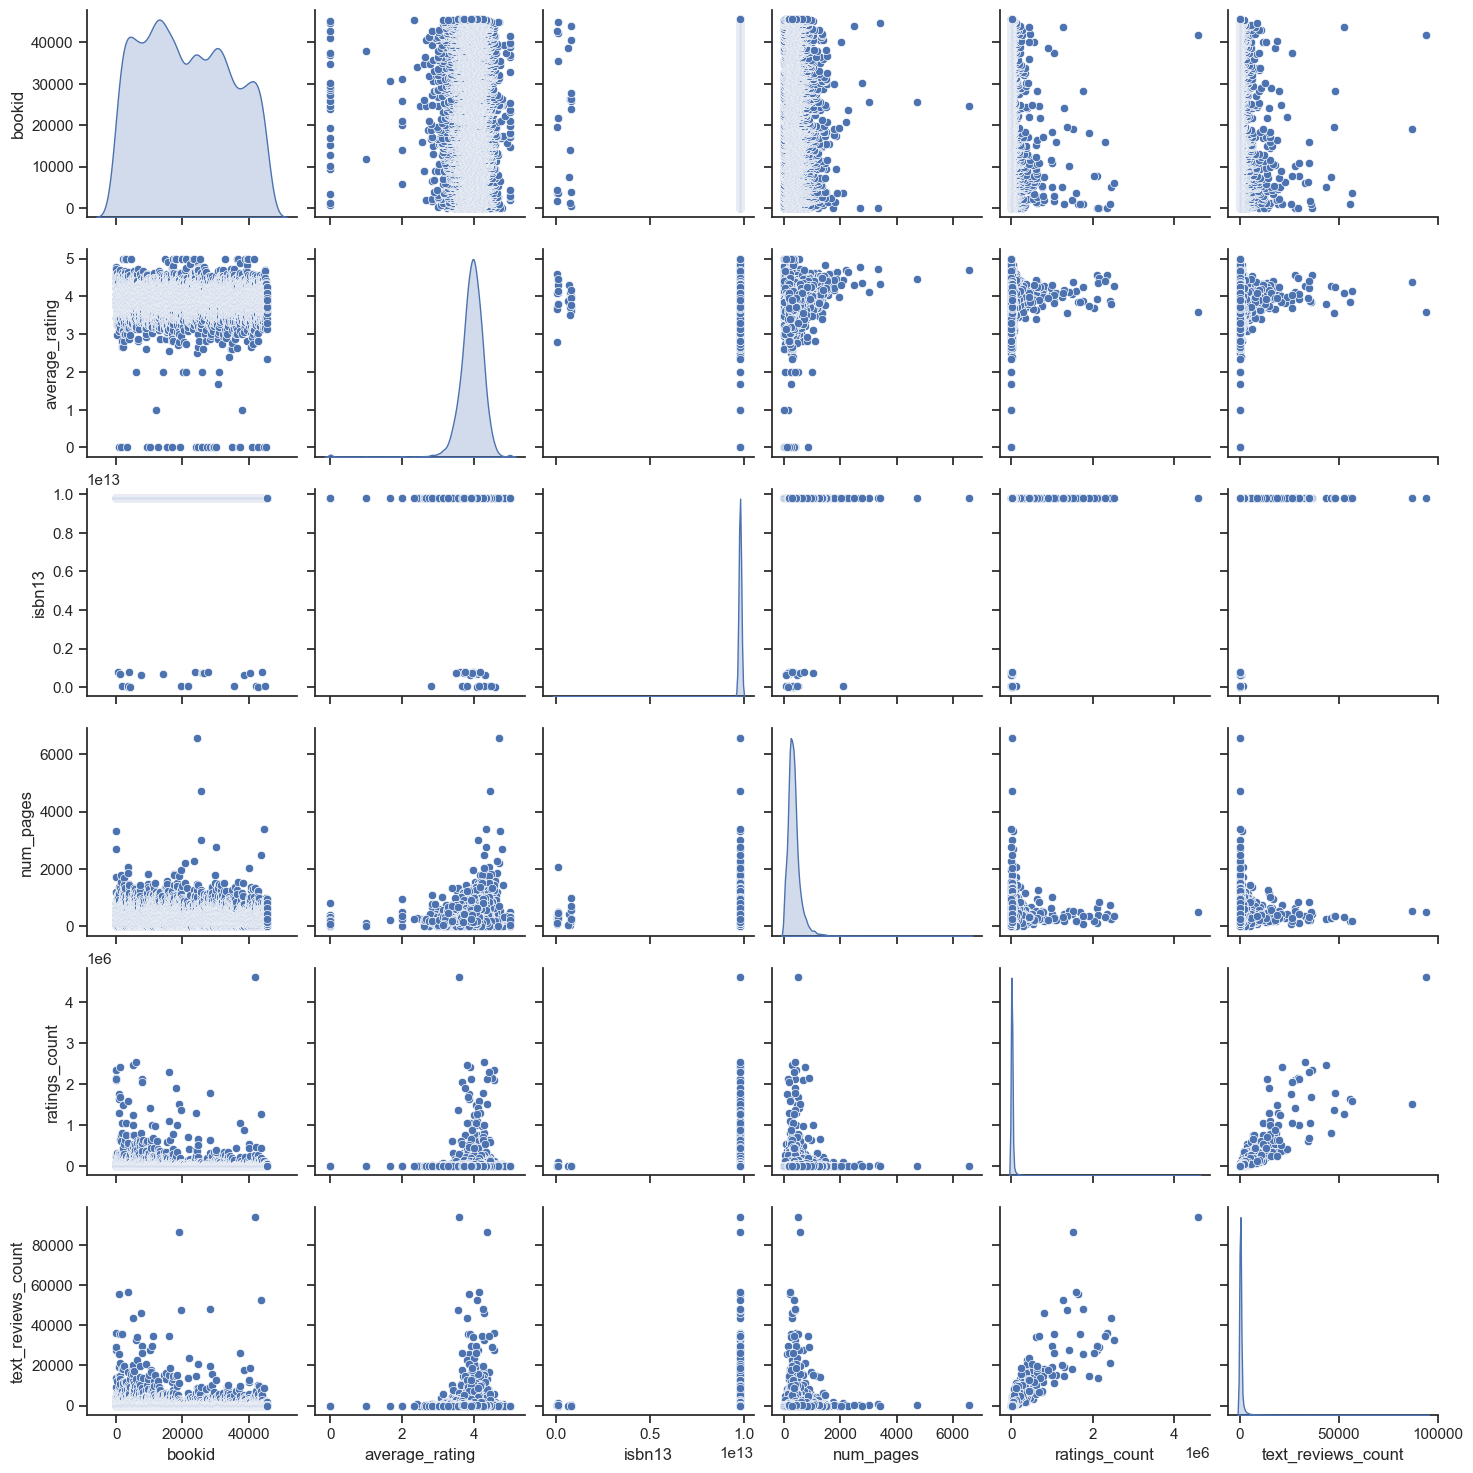

In [108]:
import seaborn as sns

sns.set(style="ticks")
sns.pairplot(books_df, diag_kind="kde")

In [96]:
df = books_df.copy()
df['title_length'] = df['title'].apply(lambda x: len(str(x)))
title_length_stats = df['title_length'].describe()
print("Title length statistics:\n", title_length_stats)

Title length statistics:
 count    11127.000000
mean        35.744046
std         23.610315
min          2.000000
25%         18.000000
50%         31.000000
75%         47.000000
max        254.000000
Name: title_length, dtype: float64


In [97]:
df['title_word_count'] = df['title'].apply(lambda x: len(str(x).split()))
title_word_count_stats = df['title_word_count'].describe()
print("Title word count statistics:\n", title_word_count_stats)


Title word count statistics:
 count    11127.000000
mean         5.961086
std          3.890328
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         36.000000
Name: title_word_count, dtype: float64


In [98]:
unique_authors = df['authors'].nunique()
print(f"Number of unique authors: {unique_authors}")

Number of unique authors: 6643


In [99]:
most_frequent_authors = df['authors'].value_counts().head(10)
print("Most frequent book authors (top 10):\n", most_frequent_authors)

Most frequent book authors (top 10):
 authors
Stephen King        40
P.G. Wodehouse      40
Rumiko Takahashi    39
Orson Scott Card    35
Agatha Christie     33
Piers Anthony       30
Sandra Brown        29
Mercedes Lackey     29
Dick Francis        28
Terry Pratchett     23
Name: count, dtype: int64


In [100]:
books_per_author = df['authors'].value_counts()
books_per_author_stats = books_per_author.describe()
print("Books per author statistics:\n", books_per_author_stats)

Books per author statistics:
 count    6643.000000
mean        1.674996
std         2.280117
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        40.000000
Name: count, dtype: float64


In [101]:
# but what if we want to take the authors with collaborations into account?
# For example, what if one of the authors has solo books and collaborations?
# Let's split the 'author' column into separate columns
df_authors_split = df['authors'].str.split('/', expand=True)

# Add the split columns back to the original DataFrame (if needed)
df = pd.concat([books_df, df_authors_split], axis=1)

# Now each author is in its own column, e.g., 'Author 1', 'Author 2', etc.
df.head()


,bookid,title,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,...,41,42,43,44,45,46,47,48,49,50
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,9780439785969,en,652,2095690,27591,2006-09-16,...,None,None,None,None,None,None,None,None,None,None
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,9780439358071,en,870,2153167,29221,2004-09-01,...,None,None,None,None,None,None,None,None,None,None
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,9780439554893,en,352,6333,244,2003-11-01,...,None,None,None,None,None,None,None,None,None,None
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,9780439655484,en,435,2339585,36325,2004-05-01,...,None,None,None,None,None,None,None,None,None,None
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,9780439682589,en,2690,41428,164,2004-09-13,...,None,None,None,None,None,None,None,None,None,None


In [102]:
# Melt the DataFrame to long format, where each row corresponds to an individual author
df_long = df_authors_split.melt(var_name='author_number', value_name='authors').dropna()

# Merge back with the original DataFrame to retain other columns (e.g., ratings, title)
df_long = df_long.join(df.drop(columns='authors'), how='left')

# Now each author appears individually in the DataFrame
df_long.head()


,author_number,authors,bookid,title,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,...,41,42,43,44,45,46,47,48,49,50
0,0,J.K. Rowling,1.0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,9.780440e+12,en,652.0,2095690.0,27591.0,...,None,None,None,None,None,None,None,None,None,None
1,0,J.K. Rowling,2.0,Harry Potter and the Order of the Phoenix (Har...,4.49,9.780439e+12,en,870.0,2153167.0,29221.0,...,None,None,None,None,None,None,None,None,None,None
2,0,J.K. Rowling,4.0,Harry Potter and the Chamber of Secrets (Harry...,4.42,9.780440e+12,en,352.0,6333.0,244.0,...,None,None,None,None,None,None,None,None,None,None
3,0,J.K. Rowling,5.0,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,9.780440e+12,en,435.0,2339585.0,36325.0,...,None,None,None,None,None,None,None,None,None,None
4,0,J.K. Rowling,8.0,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,9.780440e+12,en,2690.0,41428.0,164.0,...,None,None,None,None,None,None,None,None,None,None


In [103]:
# Count the number of publications per author
publications_per_author = df_long['authors'].value_counts()
print("Number of publications per author:\n", publications_per_author)


Number of publications per author:
 authors
Stephen King           99
William Shakespeare    93
J.R.R. Tolkien         55
Sandra Brown           48
P.G. Wodehouse         47
                       ..
Dan Slott               1
Matthew J. Gibney       1
Arnon Grunberg          1
Nadeem Aslam            1
Liesl Mueller           1
Name: count, Length: 9240, dtype: int64


In [104]:
# Calculate the average rating per author
avg_rating_per_author = df_long.groupby('authors')['average_rating'].mean().sort_values(ascending=False)
print("Average rating per author:\n", avg_rating_per_author)


Average rating per author:
 authors
James E. Campbell    5.0
Laura Driscoll       5.0
Todd Davis           5.0
Sara Barton-Wood     5.0
Ian        Martin    5.0
                    ... 
橋口 たかし               NaN
皇冠編譯組                NaN
神尾葉子                 NaN
荒川弘                  NaN
趙丕慧                  NaN
Name: average_rating, Length: 9240, dtype: float64


In [105]:
# Calculate the total number of pages per author
total_pages_per_author = df_long.groupby('authors')['num_pages'].sum().sort_values(ascending=False)
print("Total number of pages per author:\n", total_pages_per_author)


Total number of pages per author:
 authors
Stephen King           34457.0
William Shakespeare    27133.0
J.R.R. Tolkien         25518.0
Fyodor Dostoyevsky     19620.0
Leo Tolstoy            17321.0
                        ...   
Jeanne Schulkind           0.0
Jeanne D'Haem              0.0
Jeanne Clidas              0.0
Jean-Pierre Pugi           0.0
趙丕慧                        0.0
Name: num_pages, Length: 9240, dtype: float64


In [106]:
num_pages_zero_count = df[books_df['num_pages'] == 0.0].shape[0]
print(f"Number of books 'num_pages' = 0: {num_pages_zero_count}")

Number of books 'num_pages' = 0: 76


### The 2nd Dataset

In [5]:
books_big.head()

,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002-01-01,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001-01-01,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991-01-01,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999-01-01,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999-01-01,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
books_big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   isbn                 271360 non-null  object        
 1   book_title           271360 non-null  object        
 2   book_author          271358 non-null  object        
 3   year_of_publication  266737 non-null  datetime64[ns]
 4   publisher            271358 non-null  object        
 5   image_url_s          271360 non-null  object        
 6   image_url_m          271360 non-null  object        
 7   image_url_l          271357 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 16.6+ MB


In [7]:
ratings.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1149780 non-null  int64 
 1   isbn         1149780 non-null  object
 2   book_rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [9]:
ratings.user_id.nunique()

105283

In [28]:
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [29]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   user_id   278858 non-null  int64  
 1   location  278858 non-null  object 
 2   age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [10]:
users.user_id.nunique()

278858